#Perceptron

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [110]:
np.random.seed(0)


In [111]:
mu1=[-2,2]
sigma1=[[0.9,-0.0255],[-0.0255,0.9]]
n_sample=500
data1=np.random.multivariate_normal(mu1,sigma1,n_sample)

In [112]:
mu2=[5,5]
sigma2=[[0.5,0],[0,0.3]]
data2=np.random.multivariate_normal(mu2,sigma2,n_sample)

In [113]:
data=np.vstack((data1,data2))
Y=np.hstack((np.zeros(n_sample),np.ones(n_sample)))

In [114]:
X=np.column_stack((data,np.ones(2*n_sample)))


In [115]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=8)

In [116]:
def step_act(value):
  return 1 if value>=0 else 0


In [117]:
def train_perceptron(data,labels,learning_rate,max_epoch):
  n_feature=data.shape[1]
  weight=np.random.uniform(-0.5,0.5,n_feature).round(1)

  for epoch in range(max_epoch):
    for input,label in zip(data,labels):
      pred=step_act(np.dot(input,weight))
      error=label-pred
      weight+= learning_rate*error*input
  return weight




In [118]:
wgt=train_perceptron(x_train,y_train,0.1,100).round(3)

In [119]:
print('Final updated weights:',wgt)

Final updated weights: [ 0.56 -0.09 -0.5 ]


In [120]:
def test_perceptron(data,weights):
  y_pred=[]
  for input in data:
    pred=step_act(np.dot(input,weights))
    y_pred.append(pred)
  return y_pred



In [121]:
def accuracy(y_test,y_predict):
  corr_pred=0
  for test,pred in zip(y_test,y_predict):
    if abs(test-pred)<0.01:
      corr_pred+=1
  acc=corr_pred/len(y_test)
  return acc



In [122]:
y_pred=test_perceptron(x_test,wgt)
accr=accuracy(y_test,y_pred)
print('Accuracy of perceptron:',accr)


Accuracy of perceptron: 1.0


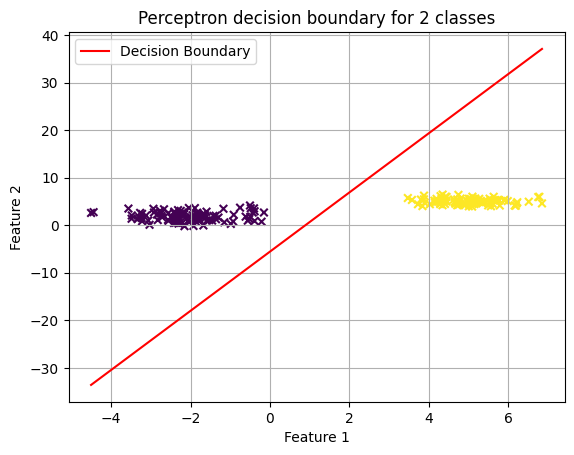

In [125]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test,marker='x',s=30)
xval=np.linspace(np.min(x_test[:,0]),np.max(x_test[:,0]),100)
yval=(-wgt[0]*xval-wgt[2])/wgt[1]
plt.plot(xval,yval,'r',label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron decision boundary for 2 classes')
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix(Test Set)')

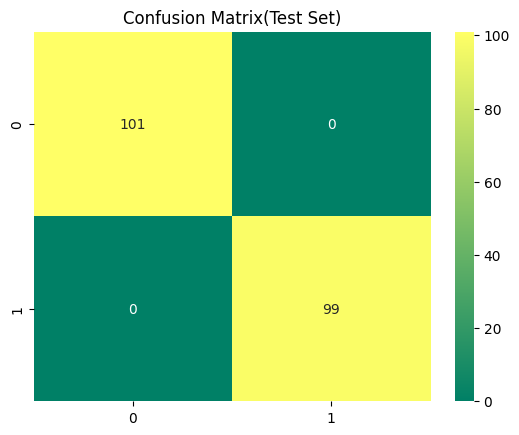

In [124]:
conmat=confusion_matrix(y_test,y_pred)
sns.heatmap(conmat,annot=True,cmap='summer',fmt='d')
plt.title('Confusion Matrix(Test Set)')